# 다차원 척도법(MDS)
***

### 설명
- 객체간 근접성을 시각화하는 통계기법
- 군집분석과 같이 개체들을 대상으로 변수들을 측정한 후 개체들 사이의 유사성 및 비유사성을 측정하여 개체들을 2차원 공간상에 표현
- 개체들 사이의 집단화를 시각화로 표현

### 목적
- 데이터 속에 잠재된 패턴 및 구조 탐색
- 데이터의 구조를 소수 차원의 공간에 기하학적으로 표현
- 데이터 축소의 목적

### 방법
- 유클리드 거리 행렬 이용
- 적합 정도를 스트레스 값으로 확인(0 : 완벽 / ~0.05 : 매우 좋음 / ~0.1 : 만족 / ~0.15 : 보통 / 0.15~ : 나쁨)

### 종류
#### 계량적 MDS
- 데이터가 구간척도(온도, 학력, 시험점수 등)나 비율척도(연령, 무게, 신장 등)인 경우 활용(전통적 방법)
- n개의 케이스에 대해 p개의 특성변수가 있는 경우 각 개체들간의 유클리드 거리행렬 계산후 개체들간의 비유사성 s(거리제곱 행렬의 선형함수)를 공간상에 표현

In [7]:
import pandas as pd
import numpy as np

from sklearn.manifold import MDS,mds
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.manifold.mds module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.manifold. Anything that cannot be imported from sklearn.manifold is now part of the private API.
  warnings.warn(message, FutureWarning)


In [118]:
data = pd.read_csv('/Users/kisehyun/Downloads/european_city_distances.csv', encoding = 'cp949', sep = ';', header = None).iloc[:, :-1]
data.index = data[0]
data = data.iloc[:, 1:]
data.columns = data.index
data.index.name = None

In [119]:
data.head()

,Barcelona,Belgrade,Berlin,Brussels,Bucharest,Budapest,Copenhagen,Dublin,Hamburg,Istanbul,...,Moscow,Munich,Paris,Prague,Rome,Saint Petersburg,Sofia,Stockholm,Vienna,Warsaw
Barcelona,0.00,1528.13,1497.61,1062.89,1968.42,1498.79,1757.54,1469.29,1471.78,2230.42,...,3006.93,1054.55,831.59,1353.90,856.69,2813.02,1745.55,2276.51,1347.43,1862.33
Belgrade,1528.13,0.00,999.25,1372.59,447.34,316.41,1327.24,2145.39,1229.93,809.48,...,1710.99,773.33,1445.70,738.10,721.55,1797.75,329.46,1620.96,489.28,826.66
Berlin,1497.61,999.25,0.00,651.62,1293.40,689.06,354.03,1315.16,254.51,1735.01,...,1607.99,501.97,876.96,280.34,1181.67,1319.62,1318.67,810.38,523.61,516.06
Brussels,1062.89,1372.59,651.62,0.00,1769.69,1131.52,766.67,773.20,489.76,2178.85,...,2253.26,601.87,261.29,721.08,1171.34,1903.66,1697.83,1280.88,914.81,1159.85
Bucharest,1968.42,447.34,1293.40,1769.69,0.00,639.77,1571.54,2534.72,1544.17,445.62,...,1497.56,1186.37,1869.95,1076.82,1137.38,1740.39,296.68,1742.25,855.32,946.12


In [120]:
data.shape

(24, 24)

In [121]:
#scaler = StandardScaler()
#scaled_df = scaler.fit_transform(data)

In [122]:
mds = MDS(n_components = 2, dissimilarity = 'euclidean', random_state = 61)
result = mds.fit(data)

#### dissimilarity는 default는 euclidean, Pre-computed dissimilarities are passed
#### metric은 default 값이 True로 계량적 False는 비계량적

In [123]:
name = data.columns
embedding = result.embedding_

In [124]:
result.dissimilarity_matrix_.shape

(24, 24)

In [125]:
result.stress_

109933950.12621398

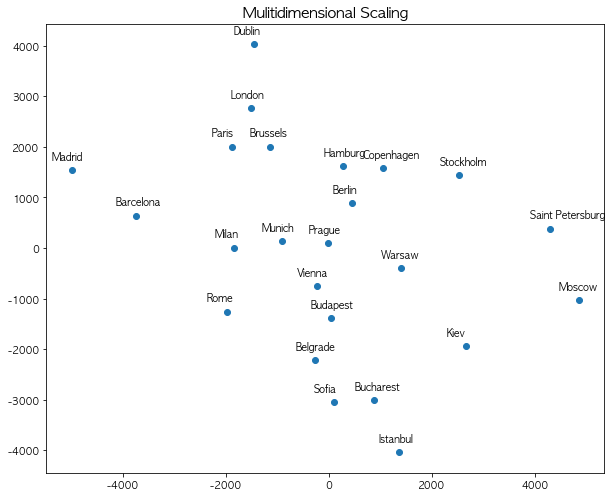

In [130]:
fig = plt.figure(figsize=(10,8))
plt.subplots_adjust(bottom=.1)
plt.scatter(embedding[:,0],embedding[:,1])
plt.title('Mulitidimensional Scaling',fontsize = 15)
for label, x,y in zip(name,embedding[:,0],embedding[:,1]) :
    plt.annotate(label,xy = (x,y),
                xytext = (-20, 10),
                textcoords = 'offset points')
    
plt.show()

#### 비계량적 MDS
- 데이터가 순서척도인 경우 활용.
- 개체들간의 거리가 순서로 주어진 경우에 사용.
***
# 주성분분석(PCA)

### 목적
- 여러 변수들의 변량을 **주성분**이라는 서로 상관관계가 높은 변수들의 선형결합으로 만들어 변수들을 요약 및 축소하는 기법
- 소수의 주성분으로 차원을 축소
- 다중공선성이 존재하는 경우 상관성이 적은 주성분으로 변수들을 축소
- 주성분분석을 통해 차원을 축소한 후에 군집분석을 수행하면 군집화 결과와 연산속도 개선 가능

### 변수 이름
- 주로 제 1성분, 제 2성분 등으로 표현

### 생성된 변수들 간의 관계
- 제 1성분이 제일 중요하고 제 2성분이 중요하게 취급

In [120]:
from sklearn.decomposition import PCA

In [136]:
u23 = pd.read_csv('/Users/kisehyun/Downloads/나/국민대/프로그래밍/19다변량/dataset/U23.csv', encoding = 'cp949')

In [137]:
u23.head()

,선수,포지션,출전경기,득점,선발출전,슈팅,골성공률,교체출전,유효슈팅,풀타임,...,퇴장,어시스트,크로스성공률,크로스횟수,킬패스횟수,돌파횟수,경합성공률,태클횟수,가로채기횟수,패스차단횟수
0,김한솔,DF,4,0,3,0,0.00,1,0,1,...,0,0,0.25,8,1,0,0.25,10,6,9
1,강민수,DF,14,1,12,6,0.17,2,2,12,...,0,1,0.50,2,0,0,0.44,33,42,101
2,강상우,MF,8,0,2,7,0.00,6,1,1,...,0,0,0.46,13,0,3,0.14,9,7,10
3,강윤구,DF,4,0,3,1,0.00,1,0,3,...,0,0,0.29,7,0,0,0.60,12,10,24
4,고무열,MF,1,0,1,1,0.00,0,0,0,...,0,0,0.00,3,0,1,0.33,3,2,0


In [138]:
u23 = u23[u23.포지션 == 'FW']
names = u23.선수.tolist()
u23 = u23[['득점', '슈팅', '골성공률', '어시스트', '돌파횟수', '중거리 슈팅', '유효슈팅']]

In [139]:
scaler = StandardScaler()
scaled = scaler.fit_transform(u23)

In [140]:
pca = PCA(n_components = 5)
comp = pca.fit_transform(scaled)

In [141]:
pca_df = pd.DataFrame(comp, columns = ['주성분1', '주성분2', '주성분3', '주성분4', '주성분5'], index = names)

In [142]:
pca_df.head()

,주성분1,주성분2,주성분3,주성분4,주성분5
김경중,-0.672842,0.544658,0.203825,-0.505497,0.324872
김근환,-1.285941,-0.230458,-0.325396,0.020694,-0.125825
김동섭,-0.017720,-0.746750,-0.619092,-0.401268,-0.171649
김동현,-1.563957,0.016803,-0.332624,0.192916,0.036770
김동희,-1.687603,0.231932,-0.191061,0.118127,0.038096


In [143]:
loadings = pd.DataFrame(pca.components_.T, columns = ['주성분1', '주성분2', '주성분3', '주성분4', '주성분5'], index = u23.columns)

In [144]:
loadings

,주성분1,주성분2,주성분3,주성분4,주성분5
득점,0.409453,-0.291171,-0.194870,-0.440096,-0.572435
슈팅,0.470718,-0.113807,-0.043832,-0.059460,0.265666
골성공률,-0.030606,-0.584657,0.808921,0.031160,0.008170
어시스트,0.387813,0.304044,0.212715,0.693308,-0.479244
돌파횟수,0.205005,0.665339,0.501073,-0.493852,0.094048
중거리 슈팅,0.450155,-0.078093,-0.084971,0.238725,0.602528
유효슈팅,0.463434,-0.138658,-0.047009,-0.142315,0.010631


In [145]:
ax = pd.DataFrame(pca_df.std()).T

In [146]:
pca_summary = pd.concat([ax,pd.DataFrame(pca.explained_variance_ratio_).set_index(ax.columns).T])

In [147]:
pca_summary

,주성분1,주성분2,주성분3,주성분4,주성분5
0,2.099584,1.081103,0.972736,0.574251,0.470549
0,0.615438,0.163174,0.132102,0.046038,0.030912


In [148]:
proportion = pca.explained_variance_ratio_
s = 0
result = []
for i in range(len(proportion)) :
    s = s+ proportion[i]
    result.append(np.round(s,4))

In [149]:
pca_summary.loc[1] = result

In [150]:
pca_summary.index = ['표준편차', '변동량', '누적변동량']

In [151]:
pca_summary

,주성분1,주성분2,주성분3,주성분4,주성분5
표준편차,2.099584,1.081103,0.972736,0.574251,0.470549
변동량,0.615438,0.163174,0.132102,0.046038,0.030912
누적변동량,0.615400,0.778600,0.910700,0.956800,0.987700


### Scree plot

In [152]:
per_var = np.round(pca.explained_variance_,decimals=1)
labels = ['주성분' + str(x) for x in range(1,len(per_var) + 1)]

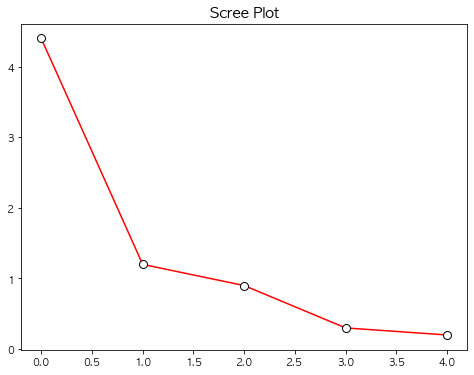

In [153]:
plt.figure(figsize = (8,6))
plt.title('Scree Plot',fontsize = 15)
plt.plot(per_var,marker = 'o',markerfacecolor = 'w',markersize = 8,markeredgecolor='k',color = 'r')
plt.show()

In [154]:
def biplot(score,coeff,value,labels) :
    pca1 = 0
    pca2 = 1
    xs = score[:,pca1]
    ys = score[:,pca2]
    n = score.shape[1]

    fig,ax = plt.subplots(figsize = (15, 12))
    ax.scatter(xs,ys)
    for i, txt in enumerate(value) :
        ax.annotate(txt,(xs[i],ys[i]))
    
    for i in range(n) :
        ax.arrow(0,0,coeff[i,pca1],coeff[i,pca2],color = 'r',alpha = 0.6)
        ax.text(coeff[i,pca1] * 1.5, coeff[i,pca2] * 1.5,labels[i], color='g', ha='center', va='center')
        

    plt.xlabel('Comp.{}'.format(pca1+1))
    plt.ylabel("Comp.{}".format(pca2+1))
    plt.grid()

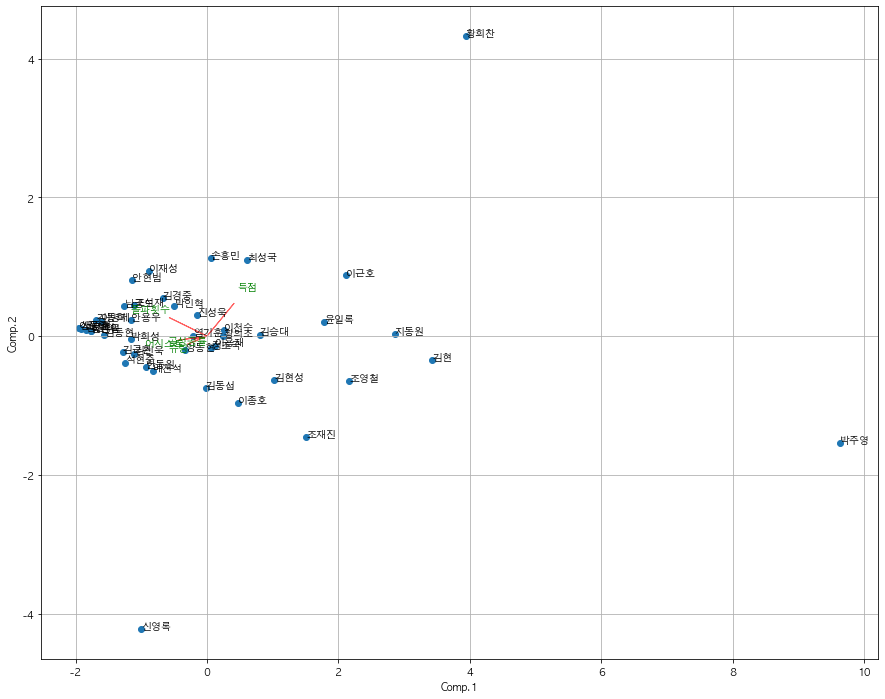

In [161]:
biplot(comp,pca.components_,names,u23.columns)

화살표 길이가 길수록 원변수의 분산을 잘 설명하는 변수라고 할 수 있다.

화살표는 원변수와 PC의 상관계수를 뜻하며 PC와 평행할수록 해당 PC에 큰 영향